yt : [INFO     ] 2024-03-05 10:50:50,095 Sample dataset found in '/Users/chavlin/data/yt_data/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2024-03-05 10:50:50,191 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2024-03-05 10:50:50,191 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-03-05 10:50:50,191 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-03-05 10:50:50,192 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-03-05 10:50:50,192 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|███████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 4151.75it/s]
yt : [INFO     ] 2024-03-05 10:50:50,260 Gathering a field list (this may take a moment.)


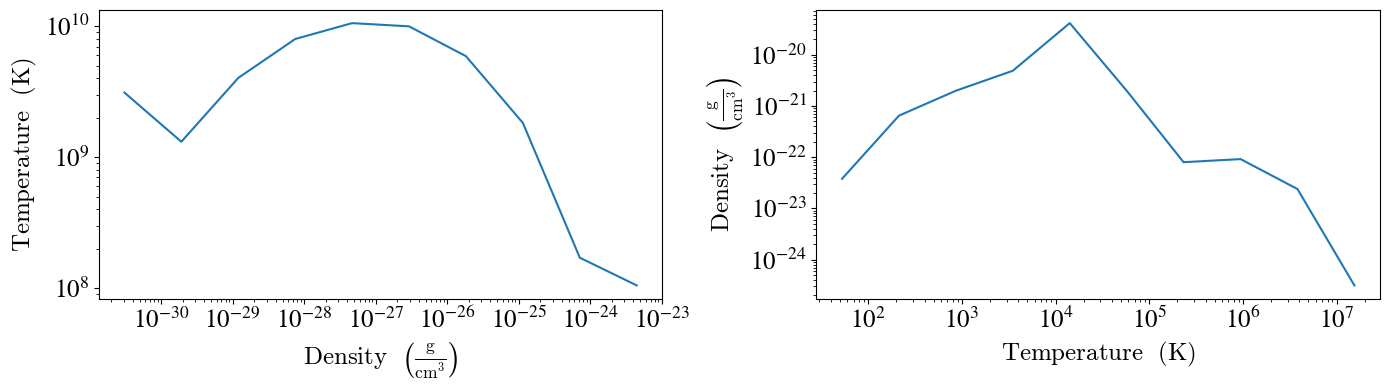

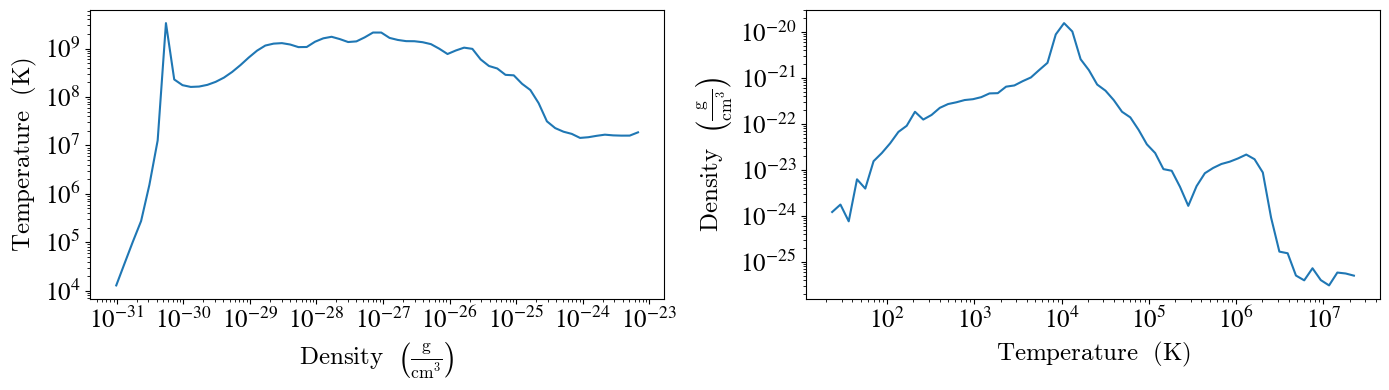

In [1]:
import yt 
import matplotlib.pyplot as plt 

ds = yt.load_sample("IsolatedGalaxy")

for n_bins in (10, 64):
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
    
    flds = [('gas', 'density'), ('gas', 'temperature')]
    for i in range(2):
        iy = 1 - i
        p = yt.ProfilePlot(
            ds.all_data(),
            flds[i],
            [flds[iy]],
            weight_field=None,
            n_bins=n_bins,
        )
        p.render()
        p.plots[flds[iy]].figure = f
        p.plots[flds[iy]].axes = axs[i]
        p.render()
    plt.tight_layout()
    f.savefig(f"profile_comparison_{n_bins}.png")